#### Load packages

In [1]:
import os

from fastai.vision.all import *
from fastai.vision import *

import pandas as pd

#### Create CSV file

Since the [ImageDataLoader](https://docs.fast.ai/vision.data.html#imagedataloaders.from_folder) requires dataset in specific format.
* it needs one class images in to the folder named of that class
* also a `labels.csv` file with two columns `name` and `label` where `name` is the path of the image and `label` is the label.

So, our dataset is in the following format... we need a create a `labels.csv` file in the folder

    dataset
        train 
            class_one
                images
                ...
            class_two
                images
                ...
            labels.csv
        valid
            class_one
                images
                ...
            class_two
                images
                ...
            labels.csv

In [2]:
def create_labels_csv_file(dataset_path: str) -> None:
    class_names = []
    for folder_name in os.listdir(dataset_path):
        class_names.append(folder_name)

    image_paths = []
    labels = []

    for i in range(len(class_names)):
        class_name = class_names[i]
        if '.csv' in os.path.basename(class_name):
            continue
        image_names = os.listdir(
            os.path.join(
                dataset_path,
                class_name
            )
        )
        for image_name in image_names:
            image_path = os.path.join(
                dataset_path,
                class_name,
                image_name
            )
            image_paths.append(image_path)
            labels.append(i)

    df = pd.DataFrame(
        {
            'name': image_paths,
            'label': labels
        }
    )

    df.to_csv(
        path_or_buf=os.path.join(
            dataset_path,
            'labels.csv'
        ),
        index=False
    )

In [3]:
create_labels_csv_file(
    dataset_path=os.path.join(
        'dataset',
        'train'
    )
)

create_labels_csv_file(
    dataset_path=os.path.join(
        'dataset',
        'valid'
    )
)

#### Load the data

In [4]:
dls = ImageDataLoaders.from_folder(
    path='dataset',
    train='train',
    valid='valid',
    item_tfms=Resize(224),
    bs=16,
    batch_tfms=[Normalize.from_stats(*imagenet_stats), RandTransform()]
)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


#### Let's see the images

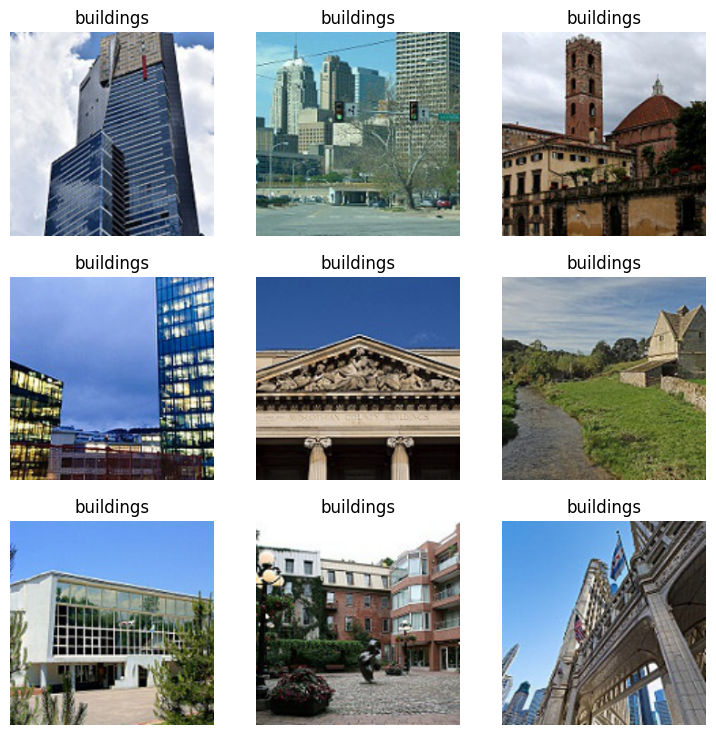

In [5]:
dls.valid.show_batch()

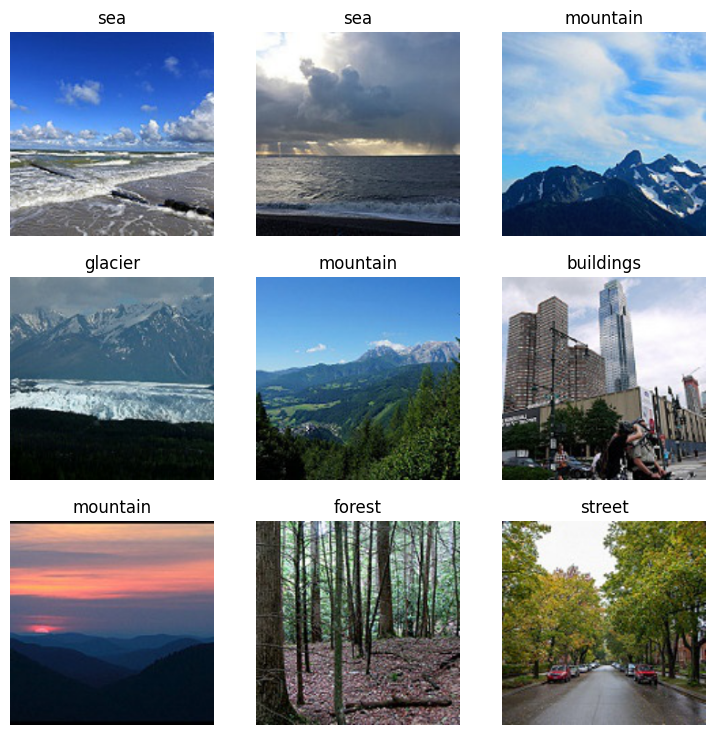

In [6]:
dls.train.show_batch()

#### Build a model

In [7]:
model = vision_learner(
    dls=dls,
    arch=models.resnet50,
    metrics=[accuracy, error_rate]
)

c:\Users\91955\miniconda3\envs\envpytorch38\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
c:\Users\91955\miniconda3\envs\envpytorch38\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### Train the model

In [8]:
model.fine_tune(
    epochs=1
)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.413045,0.328215,0.882333,0.117667,03:12


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.251767,0.177287,0.934667,0.065333,04:13


#### Let's see the results

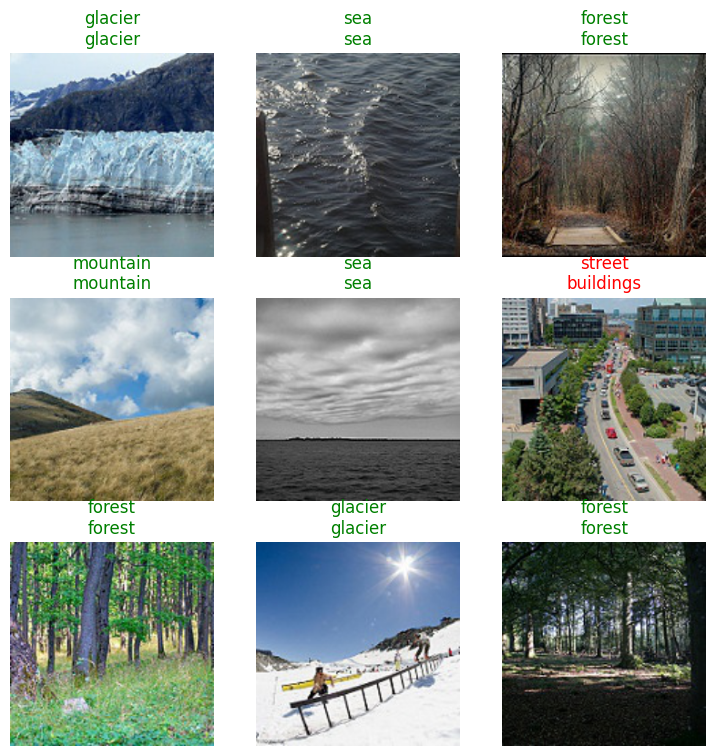

In [10]:
model.show_results()

In [11]:
model.validate()

(#3) [0.17728742957115173,0.9346666932106018,0.06533333659172058]

#### Save the model

In [12]:
model.export('intel_scene_classifier.pkl')

#### Load the model

In [13]:
new_model = load_learner('dataset\intel_scene_classifier.pkl')

#### Predict on a single image

In [14]:
new_model.predict(
    item='dataset/test/test/24298.jpg'
)

('street',
 TensorBase(5),
 TensorBase([1.5563e-02, 3.7160e-06, 1.3114e-05, 1.9806e-06, 3.9234e-06,
             9.8441e-01]))